In [1]:
%load_ext autoreload
%autoreload 2

In [18]:
import torch
import cmasher as cm
import polars as pl
import seaborn as sns
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import sys
import colorcet as cc
from panoradio_hf.data import *
from panoradio_hf.analysis import *
%matplotlib inline

In [16]:
initialize_data_splits()

In [13]:
train_data = np.load(get_datasplit_data_path("train"))
train_data = train_data[:, 0, :] + 1j * train_data[:, 1, :]

train_data_tags =\
    pd.read_csv(get_datasplit_data_tags_path("train"))

train_data_tags.drop(columns=["idx"],
                     inplace=True)

train_data_tags.reset_index(inplace=True)

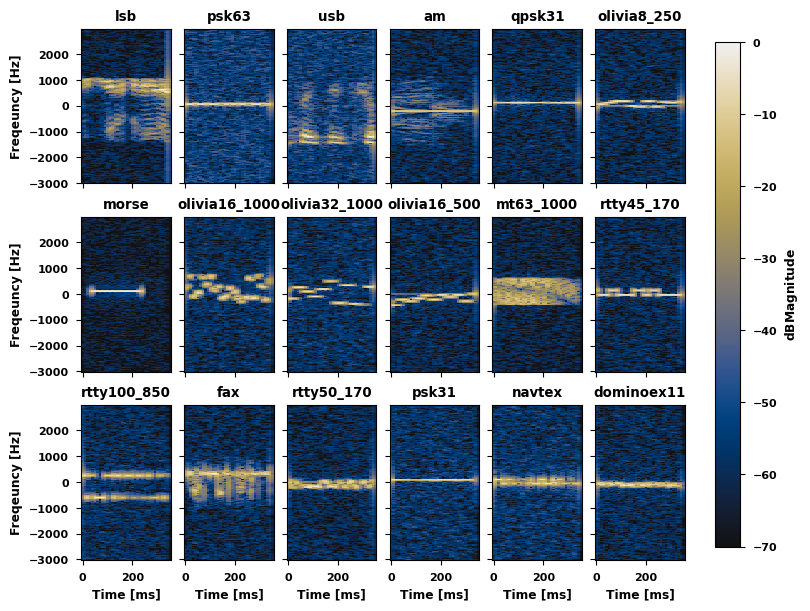

In [19]:
modeid_index = init_modeid_index(train_data_tags)

plt_index = init_plot_index(modeid_index,
                            fixed_sample_idx=1)

tms, fhz, zxx = compute_modeid_stft(plt_index,
                                    train_data)

plot_stft(tms, fhz, zxx)

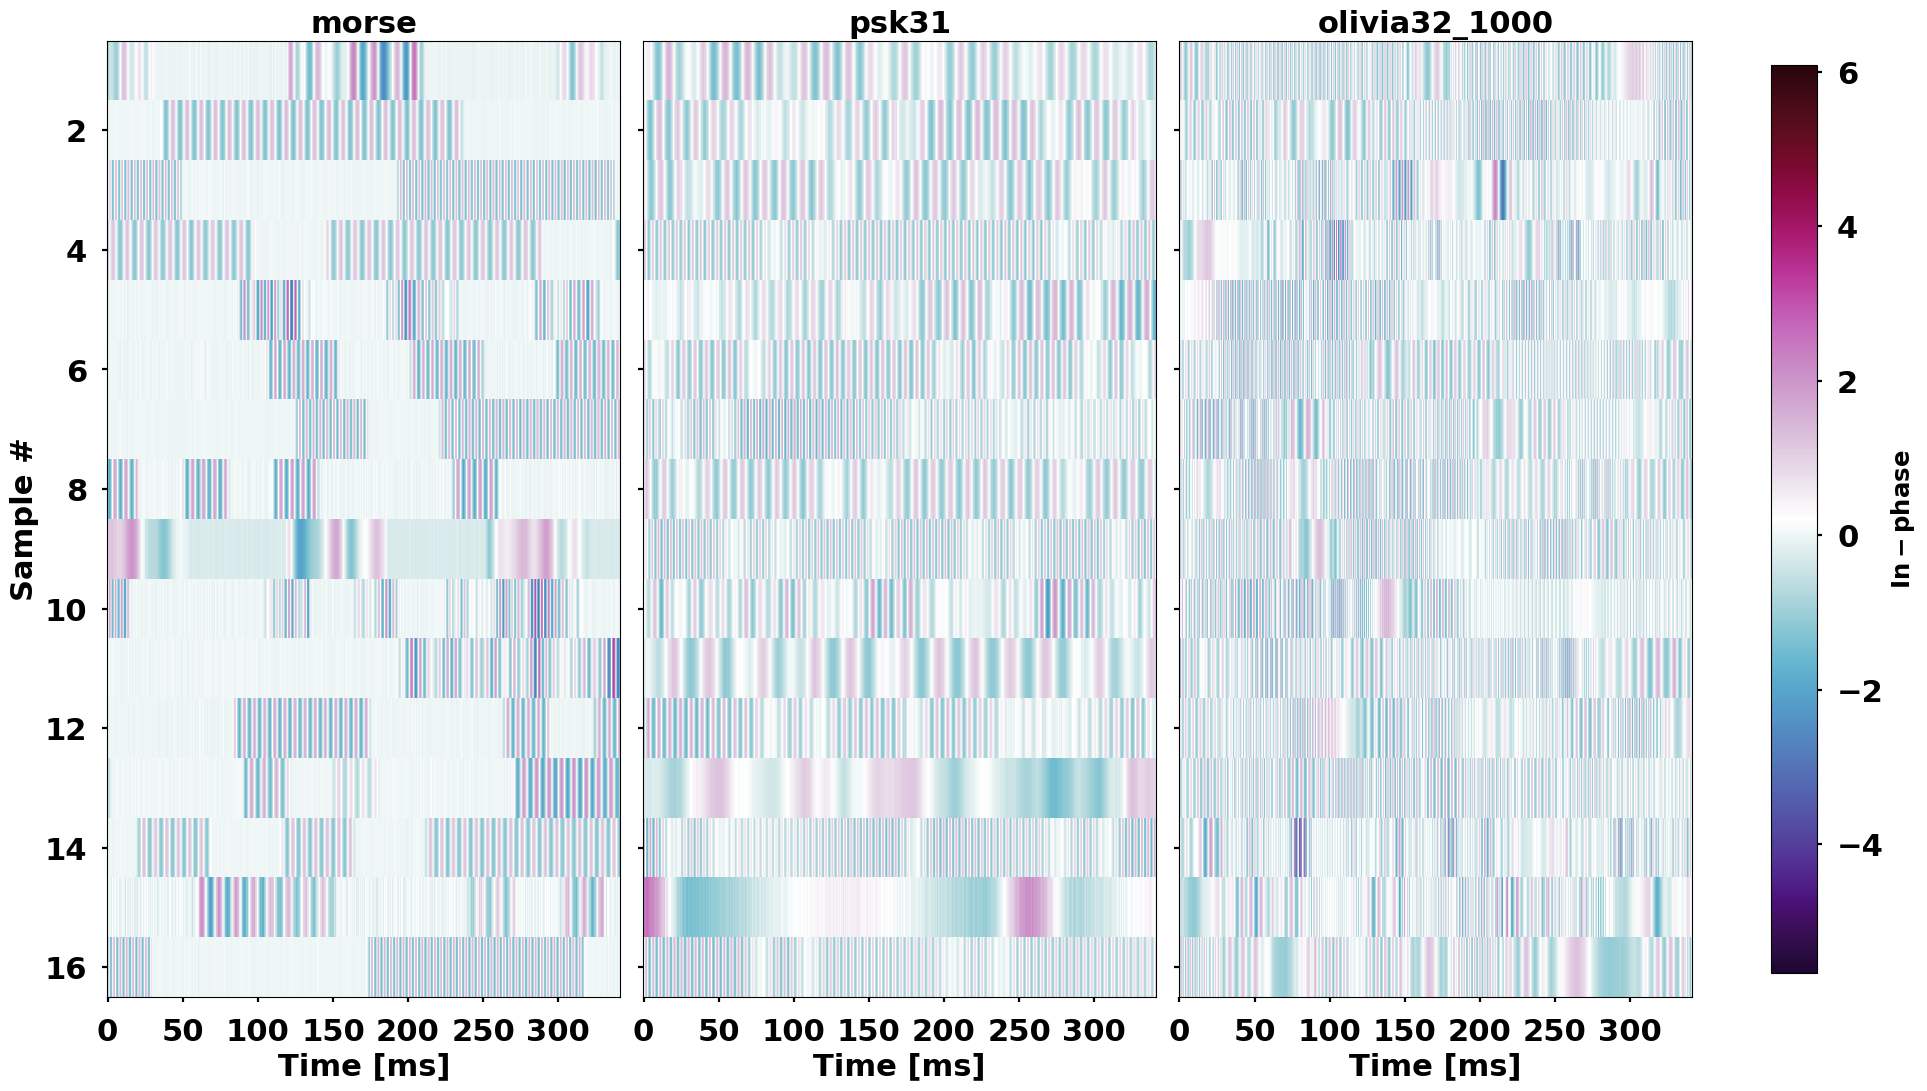

In [20]:
plot_modeid_inphase(modeid_index, train_data)